In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import random
import scipy.stats
from scipy.stats import zscore
import seaborn as sns
#imported required modules

In [94]:
#data import
data = pd.read_csv("Video_Games_final.csv")
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data cleaning

#droping rows with more than 5 na values
data = data.dropna(thresh = 11)
#droping rows with more than 3 attributes having 0.0 as it would be insufficient data
data1 = data.replace(np.nan , 1024)
data1 = data1.replace(0.00 , np.nan)
data1 = data1.dropna(thresh = 14)
data1 = data1.replace(1024 , np.nan)
#replacing na of numeric fields with the mean from its column 
data1['JP_Sales'] = data1['JP_Sales'].fillna((data1['JP_Sales'].mean()))
data1['Critic_Score'] = data1['Critic_Score'].fillna((data1['Critic_Score'].mean()))
data1['Critic_Count'] = data1['Critic_Count'].fillna((data1['Critic_Count'].mean()))
data1['User_Count'] = data1['User_Count'].fillna((data1['User_Count'].mean()))
data1['NA_Sales'] = data1['NA_Sales'].fillna((data1['NA_Sales'].mean()))
data1['Other_Sales'] = data1['Other_Sales'].fillna((data1['Other_Sales'].mean()))
data1['EU_Sales'] = data1['EU_Sales'].fillna((data1['EU_Sales'].mean()))
data1['Global_Sales'] = data1['Global_Sales'].fillna((data1['Global_Sales'].mean()))
data1 = data1.drop("Rating", axis=1)
data1 = data1.replace("tbd" , np.nan)
data1["User_Score"] = pd.to_numeric(data1["User_Score"])
data1['User_Score'] = data1['User_Score'].fillna((data1['User_Score'].mean()))
#replacing all categorical data with the data present in previous row of the same column
data1 = data1.fillna(method='ffill')

In [3]:
#checking if any null values present
data1.isnull().any()

Name               False
Platform           False
Year_of_Release    False
Genre              False
Publisher          False
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score       False
Critic_Count       False
User_Score         False
User_Count         False
Developer          False
dtype: bool

In [4]:
data1.isnull().sum().sum()
#0 null values present

0

In [5]:
data1

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.360000,28.96,3.770000,8.4500,82.53,76.0000,51.00000,8.000000,322.000000,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.680000,12.76,3.790000,3.2900,35.52,82.0000,73.00000,8.300000,709.000000,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.610000,10.93,3.280000,2.9500,32.77,80.0000,73.00000,8.000000,192.000000,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.280000,9.14,6.500000,2.8800,29.80,89.0000,65.00000,8.500000,431.000000,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.960000,9.18,2.930000,2.8400,28.92,58.0000,41.00000,6.600000,129.000000,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.440000,6.94,4.700000,2.2400,28.32,87.0000,80.00000,8.400000,594.000000,Nintendo
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.710000,7.47,4.130000,1.9000,23.21,91.0000,64.00000,8.600000,464.000000,Nintendo
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.920000,8.03,3.600000,2.1500,22.70,80.0000,63.00000,7.700000,146.000000,Nintendo
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.000000,4.89,0.240000,1.6900,21.81,61.0000,45.00000,6.300000,106.000000,Good Science Studio
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.010000,8.49,2.530000,1.7700,21.79,80.0000,33.00000,7.400000,52.000000,Nintendo


In [6]:
data1['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [7]:
data1['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [8]:
data1['Developer'].unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Funbox Media', 'Tate Interactive', 'Camouflaj, LLC'], dtype=object)

In [9]:
normalized_df=pd.DataFrame()

In [10]:
#first add all the categorical data
normalized_df['Platform']=data1['Platform']
normalized_df['Year_of_Release']=data1['Year_of_Release']
normalized_df['Name']=data1['Name']
normalized_df['Genre']=data1['Genre']
normalized_df['Publisher']=data1['Publisher']
normalized_df['Developer']=data1['Developer']
#now we add all the numerical data after normalization
x=data1['Critic_Score'].mean()
y=data1['Critic_Score'].std()
normalized_df['Critic_Score']=(data1['Critic_Score']-x)/y
x=data1['User_Score'].mean()
y=data1['User_Score'].std()
normalized_df['User_Score']=(data1['User_Score']-x)/y
x=data1['EU_Sales'].mean()
y=data1['EU_Sales'].std()
normalized_df['EU_Sales']=(data1['EU_Sales']-x)/y
x=data1['NA_Sales'].mean()
y=data1['NA_Sales'].std()
normalized_df['NA_Sales']=(data1['NA_Sales']-x)/y
x=data1['JP_Sales'].mean()
y=data1['JP_Sales'].std()
normalized_df['JP_Sales']=(data1['JP_Sales']-x)/y
x=data1['Other_Sales'].mean()
y=data1['Other_Sales'].std()
normalized_df['Other_Sales']=(data1['Other_Sales']-x)/y
x=data1['Global_Sales'].mean()
y=data1['Global_Sales'].std()
normalized_df['Global_Sales']=(data1['Global_Sales']-x)/y
x=data1['Critic_Count'].mean()
y=data1['Critic_Count'].std()
normalized_df['Critic_Count']=(data1['Critic_Count']-x)/y
x=data1['User_Count'].mean()
y=data1['User_Count'].std()
normalized_df['User_Count']=(data1['User_Count']-x)/y

In [11]:
normalized_df

,Platform,Year_of_Release,Name,Genre,Publisher,Developer,Critic_Score,User_Score,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Count,User_Count
0,Wii,2006.0,Wii Sports,Sports,Nintendo,Nintendo,5.143309e-01,6.451918e-01,47.009625,4.751716e+01,1.489268e+01,3.486742e+01,46.647491,1.336070e+00,2.953112e-01
2,Wii,2008.0,Mario Kart Wii,Racing,Nintendo,Nintendo,9.931569e-01,8.753403e-01,20.492407,1.774734e+01,1.497639e+01,1.336156e+01,19.853569,2.583890e+00,1.045081e+00
3,Wii,2009.0,Wii Sports Resort,Sports,Nintendo,Nintendo,8.335482e-01,6.451918e-01,17.496944,1.766619e+01,1.284171e+01,1.194451e+01,18.286173,2.583890e+00,4.345038e-02
6,DS,2006.0,New Super Mario Bros.,Platform,Nintendo,Nintendo,1.551787e+00,1.028773e+00,14.566955,1.264659e+01,2.631951e+01,1.165276e+01,16.593386,2.130138e+00,5.064868e-01
7,Wii,2006.0,Wii Play,Misc,Nintendo,Nintendo,-9.221471e-01,-4.288346e-01,14.632429,1.575341e+01,1.137673e+01,1.148605e+01,16.091819,7.688794e-01,-7.860525e-02
8,Wii,2009.0,New Super Mario Bros. Wii,Platform,Nintendo,Nintendo,1.392179e+00,9.520564e-01,10.965851,1.630986e+01,1.878533e+01,8.985366e+00,15.749842,2.980924e+00,8.222815e-01
11,DS,2005.0,Mario Kart DS,Racing,Nintendo,Nintendo,1.711396e+00,1.105489e+00,11.833390,1.082656e+01,1.639951e+01,7.568313e+00,12.837335,2.073418e+00,5.704207e-01
13,Wii,2007.0,Wii Fit,Sports,Nintendo,Nintendo,8.335482e-01,4.150433e-01,12.750034,9.910739e+00,1.418112e+01,8.610264e+00,12.546654,2.016699e+00,-4.566961e-02
14,X360,2010.0,Kinect Adventures!,Misc,Microsoft Game Studios,Good Science Studio,-6.827341e-01,-6.589831e-01,7.610277,1.695904e+01,1.173263e-01,6.693075e+00,12.039388,9.957558e-01,-1.231652e-01
15,Wii,2009.0,Wii Fit Plus,Sports,Nintendo,Nintendo,8.335482e-01,1.848948e-01,13.502992,1.001507e+01,9.702468e+00,7.026499e+00,12.027989,3.151267e-01,-2.277844e-01


Text(0.5,1,'User Score')

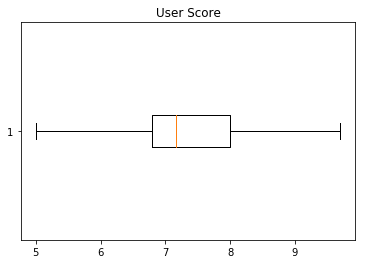

In [12]:
ax=plt.boxplot(data1["User_Score"],0,'',vert=False)
plt.title("User Score")

Text(0.5,1,'Critic Score')

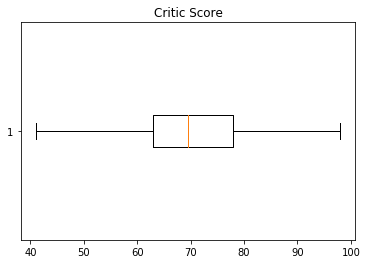

In [13]:
bx=plt.boxplot(data1["Critic_Score"],0,'',vert=False)
plt.title("Critic Score")

Text(0,0.5,'Million of copies sold')

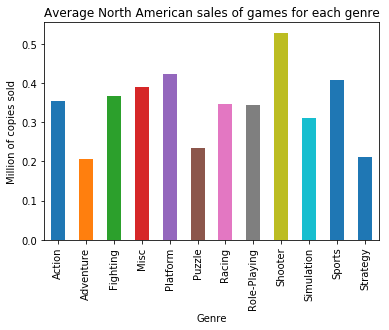

In [14]:
x=data1.groupby('Genre')['NA_Sales'].mean()
ax=x.plot.bar(title='Average North American sales of games for each genre')
ax.set_xlabel("Genre")
ax.set_ylabel("Million of copies sold")

Text(0,0.5,'Million of copies sold')

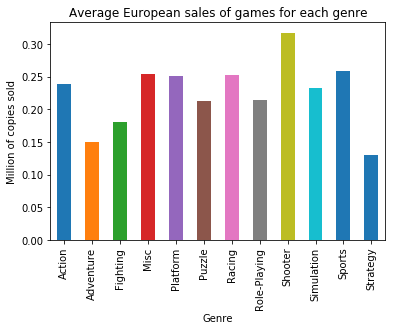

In [15]:
x=data1.groupby('Genre')['EU_Sales'].mean()
bx=x.plot.bar(title='Average European sales of games for each genre')
bx.set_xlabel("Genre")
bx.set_ylabel("Million of copies sold")

Text(0,0.5,'Million of copies sold')

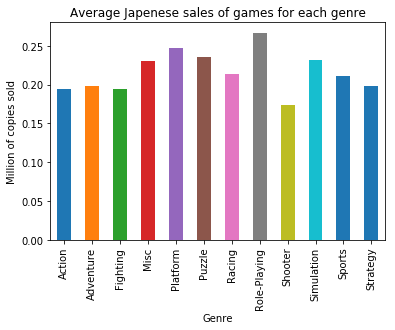

In [16]:
x=data1.groupby('Genre')['JP_Sales'].mean()
cx=x.plot.bar(title='Average Japenese sales of games for each genre')
cx.set_xlabel("Genre")
cx.set_ylabel("Million of copies sold")

Text(0,0.5,'Million of copies sold')

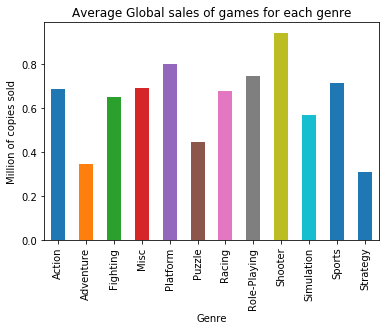

In [17]:
x=data1.groupby('Genre')['Global_Sales'].mean()
cx=x.plot.bar(title='Average Global sales of games for each genre')
cx.set_xlabel("Genre")
cx.set_ylabel("Million of copies sold")

Text(0,0.5,'Million of copies sold')

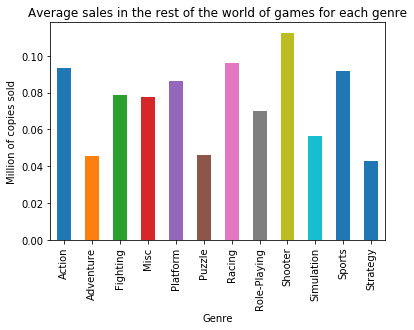

In [18]:
x=data1.groupby('Genre')['Other_Sales'].mean()
cx=x.plot.bar(title='Average sales in the rest of the world of games for each genre')
cx.set_xlabel("Genre")
cx.set_ylabel("Million of copies sold")

Text(0,0.5,'User Scores')

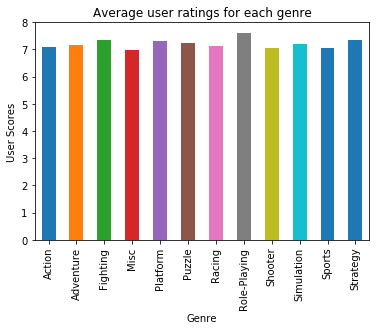

In [19]:
x=data1.groupby('Genre')['User_Score'].mean()
cx=x.plot.bar(title='Average user ratings for each genre')
cx.set_xlabel("Genre")
cx.set_ylabel("User Scores")

Text(0,0.5,'Critic Scores')

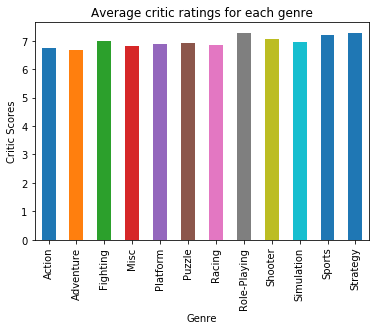

In [20]:
x=(data1.groupby('Genre')['Critic_Score'].mean())/10
cx=x.plot.bar(title='Average critic ratings for each genre')
cx.set_xlabel("Genre")
cx.set_ylabel("Critic Scores")

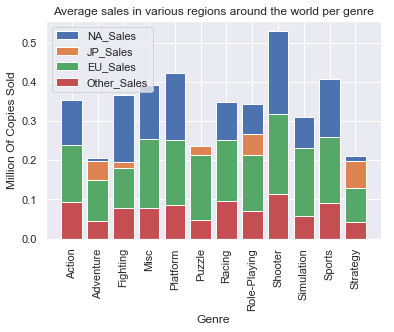

In [21]:
sns.set()
y=data1.groupby('Genre').mean()
a=plt.bar(y.index.values,y["NA_Sales"])
b=plt.bar(y.index.values,y["JP_Sales"])
c=plt.bar(y.index.values,y["EU_Sales"])
d=plt.bar(y.index.values,y["Other_Sales"])
plt.xticks(y.index.values,rotation='vertical')
plt.legend((a[0],b[0],c[0],d[0]),('NA_Sales','JP_Sales','EU_Sales','Other_Sales'))
plt.title("Average sales in various regions around the world per genre")
plt.xlabel("Genre")
plt.ylabel("Million Of Copies Sold")
plt.show()

Text(0,0.5,'Million of copies sold')

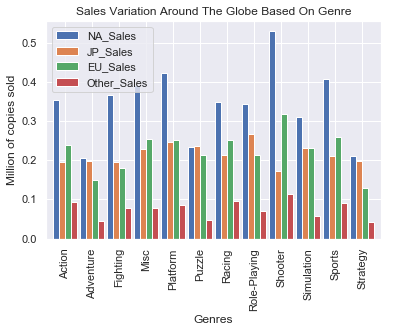

In [22]:
y['Genre']=y.index.values
abc=y.plot(x='Genre',y=['NA_Sales','JP_Sales','EU_Sales','Other_Sales'],kind='bar',align='center',width=0.9,title="Sales Variation Around The Globe Based On Genre")
abc.set_xlabel('Genres')
abc.set_ylabel("Million of copies sold")

Text(0.5,1,'North American Games Sales Split Up')

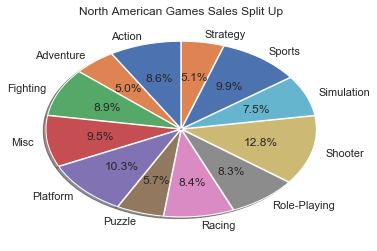

In [23]:
sum=y['NA_Sales'].sum()
l=[]
explode=[]
for i in y['NA_Sales']:
    l.append((i/sum)*100)
    explode.append(0.01)
plt.pie(l, explode=explode, labels=y['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("North American Games Sales Split Up")

Text(0.5,1,'European Games Sales Split Up')

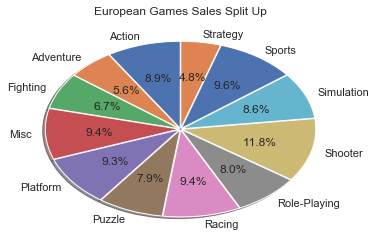

In [24]:
sum=y['EU_Sales'].sum()
l=[]
explode=[]
for i in y['EU_Sales']:
    l.append((i/sum)*100)
    explode.append(0.01)
plt.pie(l, explode=explode, labels=y['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("European Games Sales Split Up")

Text(0.5,1,'Japenese Games Sales Split Up')

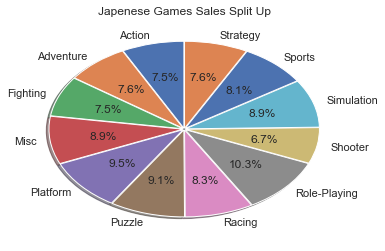

In [25]:
sum=y['JP_Sales'].sum()
l=[]
explode=[]
for i in y['JP_Sales']:
    l.append((i/sum)*100)
    explode.append(0.01)
plt.pie(l, explode=explode, labels=y['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Japenese Games Sales Split Up")

Text(0.5,1,'Rest of world Games Sales Split Up')

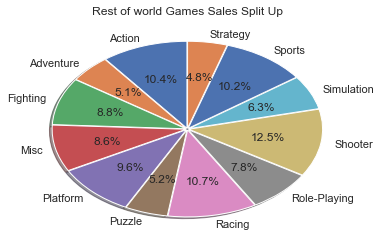

In [26]:
sum=y['Other_Sales'].sum()
l=[]
explode=[]
for i in y['Other_Sales']:
    l.append((i/sum)*100)
    explode.append(0.01)
plt.pie(l, explode=explode, labels=y['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Rest of world Games Sales Split Up")

Text(0.5,1,'Global Games Sales Split Up')

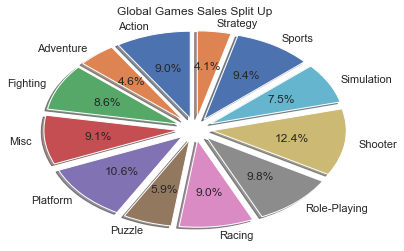

In [27]:
sum=y['Global_Sales'].sum()
l=[]
explode=[]
for i in y['Global_Sales']:
    l.append((i/sum)*100)
    explode.append(0.13)
plt.pie(l, explode=explode, labels=y['Genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Global Games Sales Split Up")

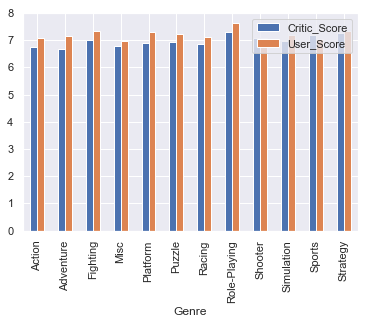

In [28]:
y['Critic_Score']=y['Critic_Score']/10
y.plot(x='Genre',y=['Critic_Score','User_Score'],kind='bar')

In [29]:
gen_grps=data1.groupby('Genre')

In [30]:
strategy=gen_grps.get_group('Strategy')
sports=gen_grps.get_group('Sports')

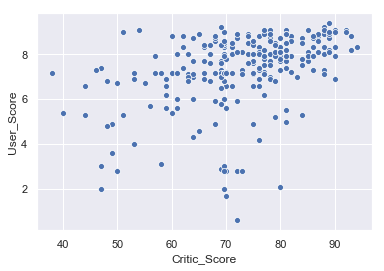

In [31]:
sns.scatterplot(x='Critic_Score',y='User_Score',data=strategy)

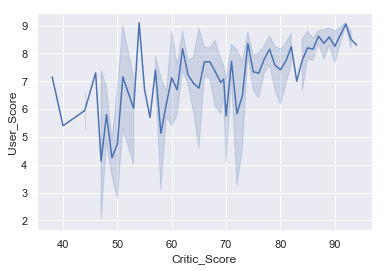

In [32]:
sns.lineplot(x='Critic_Score',y='User_Score',data=strategy)

In [33]:
plats=data1.groupby('Platform')

In [34]:
list(plats)

[('3DS',                                                  Name Platform  \
  40                                       Mario Kart 7      3DS   
  53                                Super Mario 3D Land      3DS   
  62                            New Super Mario Bros. 2      3DS   
  73                          Animal Crossing: New Leaf      3DS   
  235                        Luigi's Mansion: Dark Moon      3DS   
  312                         Monster Hunter 4 Ultimate      3DS   
  448        The Legend of Zelda: A Link Between Worlds      3DS   
  457              Animal Crossing: Happy Home Designer      3DS   
  677             The Legend of Zelda: Majora's Mask 3D      3DS   
  690                         Paper Mario: Sticker Star      3DS   
  848                            Fire Emblem: Awakening      3DS   
  901                          Mario Party: Island Tour      3DS   
  952                              Kirby: Triple Deluxe      3DS   
  1168           Kingdom Hearts 3D: Dream

In [35]:
data1['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [36]:
len(plats.get_group("PS4"))

234

In [37]:
ps4=plats.get_group("PS4")

In [88]:
'''#simple random sampling
def sampling(sample_size, no_of_samples):
    for i in range(no_of_samples):
        x = ps4['User_Score'].sample(sample_size)
        means.append(np.mean(x))
    print('Mean of means ', np.mean(means))
    print('SD with Sample_Size',sample_size,'is:', np.std(means, ddof=1))
    plt.hist(means)
    plt.title("Sampling Distribution of User Score for PS4")
means = [] #means of all 100 samples
sampling(70,100)
print("expected std_dev",np.std(ps4['User_Score'])/sqrt(100))'''

'#simple random sampling\ndef sampling(sample_size, no_of_samples):\n    for i in range(no_of_samples):\n        x = ps4[\'User_Score\'].sample(sample_size)\n        means.append(np.mean(x))\n    print(\'Mean of means \', np.mean(means))\n    print(\'SD with Sample_Size\',sample_size,\'is:\', np.std(means, ddof=1))\n    plt.hist(means)\n    plt.title("Sampling Distribution of User Score for PS4")\nmeans = [] #means of all 100 samples\nsampling(70,100)\nprint("expected std_dev",np.std(ps4[\'User_Score\'])/sqrt(100))'

In [87]:
'''#hypothesis testing
def hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = np.mean(means)
pop_mean = ps4['User_Score'].mean()
sample_size =  70
std_dev = np.std(means, ddof=1)

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject=hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')'''

"#hypothesis testing\ndef hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):\n    actual_z = abs(norm.ppf(alpha))\n    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))\n    print('actual z value :', actual_z)\n    print('hypothesis z value :', hypo_z, '\n')\n    if hypo_z >= actual_z:\n        return True\n    else:\n        return False\n    \nalpha = 0.05\nsample_mean = np.mean(means)\npop_mean = ps4['User_Score'].mean()\nsample_size =  70\nstd_dev = np.std(means, ddof=1)\n\nprint('H0 : μ <=', pop_mean)\nprint('H1 : μ >', pop_mean)\nprint('alpha value is :', alpha, '\n')\n\nreject=hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)\nif reject:\n    print('Reject NULL hypothesis')\nelse:\n    print('Failed to reject NULL hypothesis')"

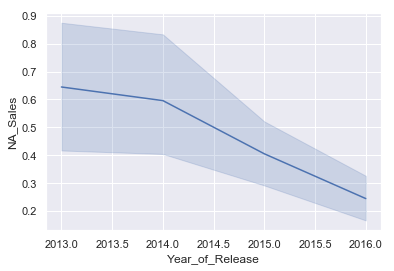

In [91]:
sns.lineplot(y="NA_Sales",x="Year_of_Release",data=ps4)

Mean of means  7.354176139265475
SD with Sample_Size 70 is: 0.16670651678390036
expected std_dev 0.16083816965685677


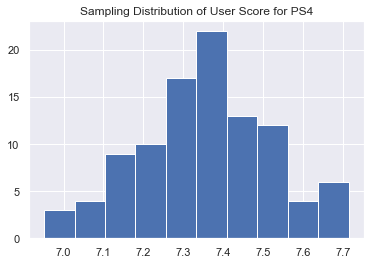

In [83]:
#simple random sampling
def sampling(sample_size, no_of_samples):
    for i in range(no_of_samples):
        x = strategy['User_Score'].sample(sample_size)
        means.append(np.mean(x))
    print('Mean of means ', np.mean(means))
    print('SD with Sample_Size',sample_size,'is:', np.std(means, ddof=1))
    plt.hist(means)
    plt.title("Sampling Distribution of User Score for PS4")
means = [] #means of all 100 samples
sampling(70,100)
print("expected std_dev",np.std(strategy['User_Score'])/sqrt(100))

In [95]:
#hypothesis testing
def hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = np.mean(means)
pop_mean = strategy['User_Score'].mean()
sample_size =  70
std_dev = np.std(means, ddof=1)

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject=hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 7.328255605278789
H1 : μ > 7.328255605278789
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : 1.3008894356055924 

Failed to reject NULL hypothesis


Text(0.5,1,'User Score')

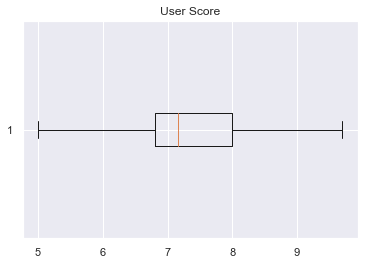

In [96]:
ax=plt.boxplot(data1["User_Score"],0,'',vert=False)
plt.title("User Score")

Text(0.5,1,'Critic Score')

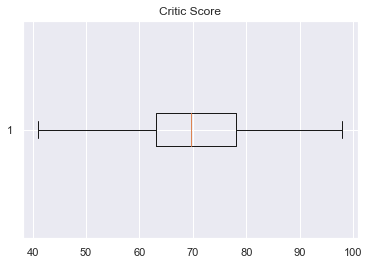

In [97]:
ax=plt.boxplot(data1["Critic_Score"],0,'',vert=False)
plt.title("Critic Score")

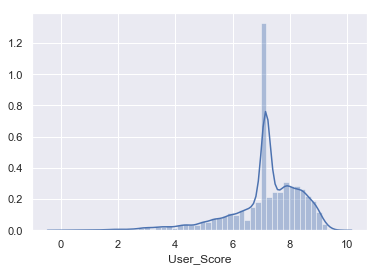

In [100]:
sns.distplot(data1["User_Score"],hist=True)

Text(0,0.5,'Frequency')

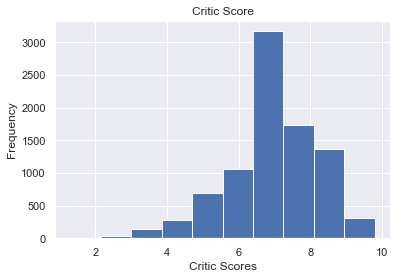

In [115]:
plt.hist(data1["Critic_Score"]/10)
plt.title("Critic Score")
plt.xlabel("Critic Scores")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

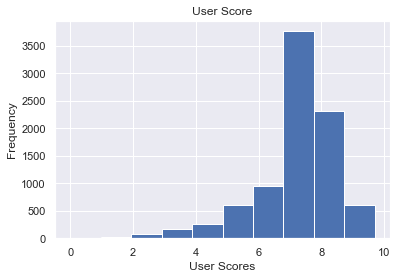

In [114]:
plt.hist(data1["User_Score"])
plt.title("User Score")
plt.xlabel("User Scores")
plt.ylabel("Frequency")

In [116]:
strategy['User_Score'].mean()

7.328255605278789